# Pendahuluan
Credit risk adalah resiko yang harus ditanggung oleh seorang individu atau lembaga ketika memberikan pinjaman - biasanya dalam bentuk uang - ke individu atau pihak lain.

Resiko ini berupa tidak bisa dibayarkannya pokok dan bunga pinjaman, sehingga mengakibatkan kerugian berikut:
* gangguan aliran kas (cash flow) sehingga modal kerja terganggu.
* meningkatkan biaya operasional untuk mengejar pembayaran tersebut (collection).

Untuk memperkecil resiko kredit ini, biasanya dilakukan proses yang disebut dengan credit scoring dan credit rating terhadap pihak peminjam. Output proses ini akan menjadi basis untuk menentukan apakah aplikasi pengajuan pinjaman baru diterima atau ditolak.


# Credit Score
Credit score adalah nilai resiko yang diberikan kepada seorang individu atau organisasi yang mengajukan pinjaman berdasarkan rekam jejak pinjaman dan pembayaran yang dilakukan. Proses pemberian credit score ini biasanya disebut sebagai credit scoring.

Perhitungan credit score biasanya dibuat berdasarkan data historis lamanya keterlambatan pembayaran dan yang tidak bayar sama sekali (bad debt). Bad debt biasanya mengakibatkan lembaga pemberian kredit harus menyita aset atau melakukan write off .

Nilai credit score biasanya bervariasi antar lembaga. Namun banyak yang kemudian mengadopsi model FICO Score yang memiliki rentang nilai 300 - 850. Semakin tinggi nilai yang didapatkan, maka semakin baik tingkat kemampuan seseorang atau sebuah lembaga untuk membayar pinjaman.

# Risk Rating
Kadang banyak lembaga yang menggunakan risk rating atau tingkat resiko. Terbalik dengan credit score, semakin tinggi rating ini menunjukkan resiko yang semakin meningkat.

Selain itu kodifikasi juga dibuat lebih simpel  dibandingkan rentang nilai sehingga keputusan yang bisa diambil lebih cepat. Contoh, misalkan penggunaan kombinasi seperti huruf AAA,  AA+, P-1, dan seterusnya. Atau  untuk banyak internal lembaga peminjam, kategorisasi hanya menggunakan rentang angka yang kecil misalkan 1 sampai dengan 5.

Mari kita lihat contoh data risk rating dengan pendekatan terakhir ini pada subbab berikutnya.

## Contoh Tabel Risk Rating
Berikut adalah contoh data risk rating yang dihasilkan berdasarkan data historis lamanya proses pengembalian pinjaman. Perhatikan kolom risk_rating  dimana terdapat angka 1 sampai dengan 5 - yang menunjukkan resiko terendah sampai tertinggi.
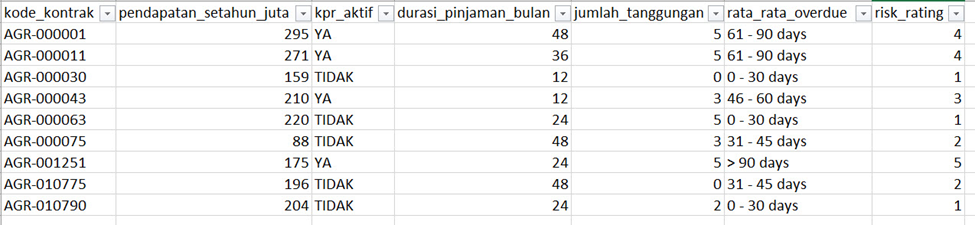
Kolom risk_rating ini berelasi langsung dengan kolom overdue_average, atau kolom keterlambatan pembayaran.
*	Jika keterlambatan sampai dengan 30 hari (0 - 30 days) maka diberikan nilai 1.
*	keterlambatan 31 sampai dengan 45 hari (31 - 45 days) maka scoring diberikan nilai 2.
*	dan seterusnya

Dari sini juga beberapa kolom juga diambil oleh analis untuk mencari pola keterkaitannya terhadap rating ini, yaitu:
*	pendapatan dalam jutaan per tahun (pendapatan_setahun_juta).
*	durasi pinjaman dalam satuan bulan (durasi_pinjaman_bulan).
*	jumlah tanggungan (jumlah_tanggungan).
*	apakah ada kpr aktif atau tidak (kpr_aktif).


# Analisa dan Model Pengambilan Keputusan
Masih terkait dengan contoh data sebelumnya, namun dengan contoh data utuh - DQLab akan memberikan ilustrasi aktivitas tindak lanjut terhadap data dengan contoh skenario berikut.

Seorang analis akan melakukan penelusuran terhadap data kita untuk mencari pola. Berikut adalah temuannya: 
*	Jika jumlah tanggungan berjumlah lebih dari 4, kecenderungan resikonya sangat tinggi (rating 4 dan 5).
*	Jika durasi pinjaman semakin lama yaitu lebih dari 24 bulan, maka kecenderungan resiko juga meningkat (rating 4 dan 5).

Dari kedua temuan ini, analis akan membentuk aturan-aturan untuk menuntun pengambilan keputusan (decision making model) terhadap pengajuan pinjaman baru untuk sebagai berikut:
*	Jika jumlah tanggungan berjumlah kurang dari 5 orang , dan durasi pinjaman kurang dari 24 bulan maka rating diberikan nilai 2 dan pengajuan pinjaman diterima. 
*	Jika jumlah tanggungan berjumlah lebih dari 4 orang dan durasi pinjaman lebih dari 24 bulan maka maka rating diberikan nilai 5 dan pengajuan pinjaman ditolak.
*	Jika jumlah tanggungan berjumlah kurang dari 5, dan durasi pinjaman kurang dari 36 bulan maka maka rating diberikan nilai 3 dan diberikan pinjaman. 

Nah, tiga aturan itu kita sebut sebagai model untuk memprediksi nilai risk rating dan menjadi basis pengambilan keputusan terhadap aplikasi pinjaman baru.
Dengan model ini, lembaga pinjaman akan semakin cepat mengambil keputusan dan dengan tingkat kesalahan pengambilan keputusan yang lebih minim.


# Decision Tree
Pada bab sebelumnya telah disebutkan sedikit mengenai proses pengambilan keputusan dengan konstruksi rangkaian "Jika kondisi x maka .... selain itu .... " atau dikenal dengan "IF ... ELSE ... ".

Dari contoh bab satu, rangkaiannya terlihat sebagai berikut:
*	Jika jumlah tanggungan berjumlah kurang dari 2 orang , dan durasi pinjaman kurang dari 42 bulan maka rating diberikan nilai 1 dan pengajuan pinjaman diterima. 
*	Jika jumlah tanggungan berjumlah lebih dari 4 orang dan durasi pinjaman lebih dari 30 bulan maka maka rating diberikan nilai 5 dan pengajuan pinjaman ditolak.
*	Jika jumlah tanggungan berjumlah kurang dari 5, dan durasi pinjaman kurang dari 30 bulan maka maka rating diberikan nilai 3 dan diberikan pinjaman. 


# Contoh Pemodelan Decision Tree dengan Machine Learning
Mari sekarang kita lihat contoh otomatisasi model decision tree dengan menggunakan salah satu algoritma populer di R, yaitu C5.0. Praktek kali ini kita hanya bertujuan untuk melihat contoh output, detilnya akan dibahas pada bab-bab selanjutnya.

Pada code editor telah diberikan contoh code untuk membaca dan menganalisa data credit rating dari file Excel, membentuk model decision tree, dan menampilkan hasilnya dalam bentuk output. Untuk itu kita perlu gunakan package C50 yang akan kita gunakan sepanjang course ini.


In [10]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 

#Menggunakan C5.0
drop_columns <- c("kpr_aktif", "pendapatan_setahun_juta", "risk_rating", "rata_rata_overdue")
datafeed <- dataCreditRating[ , !(names(dataCreditRating) %in% drop_columns)]
modelKu <- C5.0(datafeed, as.factor(dataCreditRating$risk_rating))
summary(modelKu)


Call:
C5.0.default(x = datafeed, y = as.factor(dataCreditRating$risk_rating))


C5.0 [Release 2.07 GPL Edition]  	Tue Jan 31 13:17:40 2023
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (4 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (112/30)
:   durasi_pinjaman_bulan > 24: 5 (140/55)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (246/22)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (294/86)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (41/8)
            jumlah_tanggungan > 0: 3 (67/4)


Evaluation on training data (900 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  205(22.8%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   208     2     5     6     6    (a): class 1
	    86    33    21     6    13    (b): class 2
	           4   287           

Ini adalah bentuk representasi tree dalam bentuk teks. Dimana pengecekan akan dimulai dari variable jumlah_tanggungan. Sebagai contoh, jika jumlah tanggungan lebih dari 4 dan durasi pinjaman sampai dengan maksimal 24 bulan maka rating diberikan nilai 4.

# Data Preparation untuk Class Variable

In [11]:
library("openxlsx")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")
str(dataCreditRating)

#Melakukan konversi kolom risk_rating menjadi factor
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating)

#Melihat struktur setelah konversi
str(dataCreditRating)

'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 days" "46 - 60 days" ...
 $ risk_rating            : num  4 4 1 3 2 1 2 2 2 2 ...
'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 

# Data Preparation untuk Input Variables

In [12]:
library("openxlsx")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Merubah tipe data class variable sebagai factor 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
str(dataCreditRating)

#Menghilangkan beberapa variable input dari dataset 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[, input_columns]
str(datafeed)

'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 days" "46 - 60 days" ...
 $ risk_rating            : Factor w/ 5 levels "1","2","3","4",..: 4 4 1 3 2 1 2 2 2 2 ...
'data.frame':	900 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan    : num  5 5 0 3 0 5 3 3 5 6 ...


# Mempersiapkan Training dan Testing Set

In [13]:
library("openxlsx")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan porsi index acak untuk training dan testing set
set.seed(100)
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

str(input_training_set)
str(class_training_set)
str(input_testing_set)

'data.frame':	800 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  36 24 36 36 36 24 12 48 48 12 ...
 $ jumlah_tanggungan    : num  1 1 5 1 5 3 3 3 0 0 ...
 Factor w/ 5 levels "1","2","3","4",..: 1 1 4 1 5 3 3 3 2 1 ...
'data.frame':	100 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  12 36 48 36 48 48 12 12 12 12 ...
 $ jumlah_tanggungan    : num  0 0 3 3 6 5 0 0 0 4 ...


# Menghasilkan Model dengan Fungsi C5.0

In [14]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set)


C5.0 [Release 2.07 GPL Edition]  	Tue Jan 31 13:18:59 2023
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b): class 2
	           3   250                (c): c

# Menghasilkan Plot dari Model C5.0

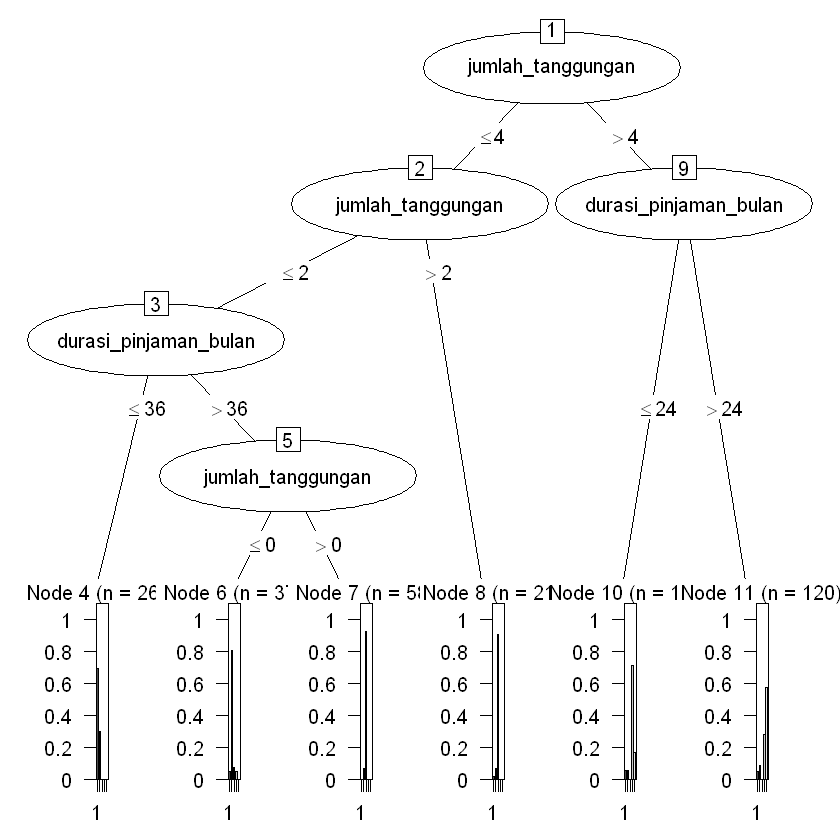

In [15]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)
plot(risk_rating_model)

# Label dari Class

In [16]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control=C5.0Control(label="Risk Rating"))
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Tue Jan 31 13:19:39 2023
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b)

# Jumlah Data dan Variable yang Digunakan

In [17]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan", "kpr_aktif")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 780)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Tue Jan 31 13:20:06 2023
-------------------------------

Class specified by attribute `Risk Rating'

Read 780 cases (4 attributes) from undefined.data

Decision tree:

kpr_aktif = TIDAK:
:...durasi_pinjaman_bulan <= 36: 1 (293/103)
:   durasi_pinjaman_bulan > 36: 2 (47/7)
kpr_aktif = YA:
:...jumlah_tanggungan <= 4: 3 (247/4)
    jumlah_tanggungan > 4:
    :...durasi_pinjaman_bulan <= 24: 4 (91/17)
        durasi_pinjaman_bulan > 24: 5 (102/34)


Evaluation on training data (780 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5  165(21.2%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   190     5     2                (a): class 1
	   101    40                 1    (b): class 2
	     1     1   243                (c): class 3
	                 2    74    33    

# Merubah Label Class Variable

In [18]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "1"] <- "satu"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "2"] <- "dua"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "3"] <- "tiga"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "4"] <- "empat"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "5"] <- "lima"
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Tue Jan 31 13:20:20 2023
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: empat (105/30)
:   durasi_pinjaman_bulan > 24: lima (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: tiga (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: satu (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: dua (37/7)
            jumlah_tanggungan > 0: tiga (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	    30     6    11    80    19    (a): class dua
	     2    75    3

# Menggunakan Fungsi Predict

In [19]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menggunakan model untuk prediksi testing set
predict(risk_rating_model, input_testing_set)

[1] 1 1 3 3 5 5 1 1 1 3 1 2 1 1 3 3 1 3 3 3 3 3 1 5 1 1 3 1 3 5 1 1 2 1 5 1 1
 [38] 5 3 3 3 3 4 3 3 1 3 5 2 3 2 5 3 5 1 5 4 5 3 4 1 3 4 4 3 5 5 5 3 1 1 1 1 3
 [75] 5 1 4 5 3 1 3 3 3 3 3 1 3 3 5 4 5 3 3 3 1 1 5 5 3 3
Levels: 1 2 3 4 5

# Menggabungkan Hasil Prediksi

In [20]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menyimpan hasil prediksi testing set ke dalam kolom hasil_prediksi
input_testing_set$risk_rating <- dataCreditRating[-indeks_training_set,]$risk_rating
input_testing_set$hasil_prediksi <- predict(risk_rating_model, input_testing_set)
print(input_testing_set)

    durasi_pinjaman_bulan jumlah_tanggungan risk_rating hasil_prediksi
3                      12                 0           1              1
5                      36                 0           2              1
8                      48                 3           2              3
40                     36                 3           2              3
41                     48                 6           2              5
44                     48                 5           2              5
58                     12                 0           1              1
70                     12                 0           1              1
109                    12                 0           1              1
110                    12                 4           3              3
122                    12                 0           1              1
151                    48                 0           2              2
179                    36                 1           1              1
180   

# Membuat Table Confusion Matrix

In [21]:
library("openxlsx")
library("C50")
library("reshape2")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menyimpan risk_rating dari data awal dan hasil prediksi testing set ke dalam kolom hasil_prediksi
input_testing_set$risk_rating <- dataCreditRating[-indeks_training_set,]$risk_rating
input_testing_set$hasil_prediksi <- predict(risk_rating_model, input_testing_set)

#membuat confusion matrix
dcast(hasil_prediksi ~ risk_rating, data=input_testing_set)


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Using hasil_prediksi as value column: use value.var to override.
Aggregation function missing: defaulting to length


hasil_prediksi,1,2,3,4,5
1,24,6,0,0,0
2,0,3,1,0,0
3,0,2,37,0,0
4,0,0,0,7,0
5,0,2,0,2,16


# Jumlah Data dengan Prediksi Benar

In [22]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menyimpan risk_rating dari data awal dan hasil prediksi testing set ke dalam kolom hasil_prediksi
input_testing_set$risk_rating <- dataCreditRating[-indeks_training_set,]$risk_rating
input_testing_set$hasil_prediksi <- predict(risk_rating_model, input_testing_set)

#Menghitung jumlah prediksi yang benar
nrow(input_testing_set[input_testing_set$risk_rating==input_testing_set$hasil_prediksi,])

[1] 87

# Jumlah Data dengan Prediksi Salah

In [23]:
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menyimpan risk_rating dari data awal dan hasil prediksi testing set ke dalam kolom hasil_prediksi
input_testing_set$risk_rating <- dataCreditRating[-indeks_training_set,]$risk_rating
input_testing_set$hasil_prediksi <- predict(risk_rating_model, input_testing_set)

#Menghitung jumlah prediksi yang salah
nrow(input_testing_set[input_testing_set$risk_rating!=input_testing_set$hasil_prediksi,])

[1] 20

# Mempersiapkan Data Pengajuan Baru

In [24]:
#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 12)
print(aplikasi_baru)

  jumlah_tanggungan durasi_pinjaman_bulan
1                 6                    12


# Melakukan Prediksi terhadap Data Pengajuan Baru

In [25]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)

#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 12)

#melakukan prediksi
predict(risk_rating_model, aplikasi_baru)

[1] 4
Levels: 1 2 3 4 5

# Merubah Durasi Pinjaman

In [26]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)

#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 64)

#melakukan prediksi
predict(risk_rating_model, aplikasi_baru)

[1] 5
Levels: 1 2 3 4 5